In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [9]:
df=pd.read_csv(r'C:\Users\PC\Downloads\play_tennis.csv')

In [10]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [11]:
from sklearn .preprocessing import LabelEncoder

In [12]:
label_encoder = preprocessing.LabelEncoder()
  
df['play']= label_encoder.fit_transform(df['play'])

In [13]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,0
1,D2,Sunny,Hot,High,Strong,0
2,D3,Overcast,Hot,High,Weak,1
3,D4,Rain,Mild,High,Weak,1
4,D5,Rain,Cool,Normal,Weak,1


In [36]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns = ['outlook', 'temp','humidity','wind'])

In [37]:
df.head()

,day,play,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,D1,0,0,0,1,0,1,0,1,0,0,1
1,D2,0,0,0,1,0,1,0,1,0,1,0
2,D3,1,1,0,0,0,1,0,1,0,0,1
3,D4,1,0,1,0,0,0,1,1,0,0,1
4,D5,1,0,1,0,1,0,0,0,1,0,1


In [38]:
from sklearn import tree 
cl=tree.DecisionTreeClassifier(criterion="entropy")

In [39]:
target=df['play']
target

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [40]:
x=df.drop(['play','day'],axis=1)
x

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [22]:
cl.fit(x,target)

DecisionTreeClassifier(criterion='entropy')

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.3,random_state=100)

In [42]:
cl.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
cl.predict(x_test)

array([0, 1, 1, 0, 1])

In [29]:
cl.score(x_test,y_test)

0.6

In [30]:
from sklearn import metrics

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pre=cl.predict(x_test)

In [33]:
accuracy_score(y_test,y_pre)

0.6

In [34]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [50]:
df2=df.drop(['play','day'],axis=1)
df2

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [46]:
feature_names=df2.columns[:]
feature_names

Index(['outlook_Overcast', 'outlook_Rain', 'outlook_Sunny', 'temp_Cool',
       'temp_Hot', 'temp_Mild', 'humidity_High', 'humidity_Normal',
       'wind_Strong', 'wind_Weak'],
      dtype='object')

In [54]:
df.columns

Index(['day', 'play', 'outlook_Overcast', 'outlook_Rain', 'outlook_Sunny',
       'temp_Cool', 'temp_Hot', 'temp_Mild', 'humidity_High',
       'humidity_Normal', 'wind_Strong', 'wind_Weak'],
      dtype='object')

In [57]:
target_names=df.columns[1]
target_names

'play'

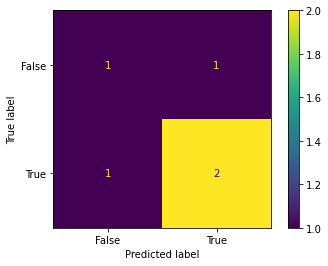

In [64]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [61]:
 from sklearn import tree

[Text(0.6666666666666666, 0.875, 'humidity_Normal <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]\nclass = l'),
 Text(0.5, 0.625, 'outlook_Sunny <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = p'),
 Text(0.3333333333333333, 0.375, 'wind_Weak <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = l'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = p'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = l'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = p'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = l')]

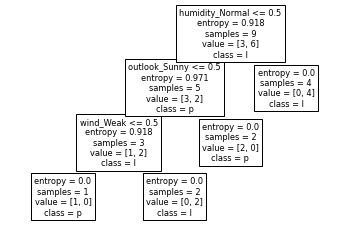

In [63]:
tree.plot_tree(cl,feature_names=feature_names,class_names=target_names)